In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress, chi2

In [2]:
data_100 = "ring1.csv"
data_110 = "ring2.csv"

In [3]:
df_100 = pd.read_csv("ring1.csv")
df_100["plane"] = 100
df_110 = pd.read_csv("ring2.csv")
df_110["plane"] = 110

df_100

,Voltage(kV),inner radius(mm),outer radius(mm),plane
0,2.5,13.65,14.95,100
1,3.0,12.50,14.75,100
2,3.5,11.60,14.25,100
3,4.0,10.85,12.95,100
4,4.5,9.80,12.55,100
5,5.0,10.00,12.05,100
6,5.5,9.20,11.25,100
7,6.0,9.05,10.50,100


In [4]:
rename = {"Voltage(kV)": "V", "inner radius(mm)": "r1", "outer radius(mm)": "r2"}
df = pd.concat([df_100, df_110]).reset_index(drop=True).rename(columns=rename)
df["V"] = 1000 * df["V"] # Put V in volts
df["r1"] = df["r1"] / 1000 # Put r1 in m
df["r2"] = df["r2"] / 1000 # Put r2 in m
df["r"] = (df["r1"] + df["r2"]) / 2
df["dr"] = 2**0.5 / 2 * 0.000005
df

,V,r1,r2,plane,r,dr
0,2500.0,0.01365,0.01495,100,0.014300,0.000004
1,3000.0,0.01250,0.01475,100,0.013625,0.000004
2,3500.0,0.01160,0.01425,100,0.012925,0.000004
3,4000.0,0.01085,0.01295,100,0.011900,0.000004
4,4500.0,0.00980,0.01255,100,0.011175,0.000004
5,5000.0,0.01000,0.01205,100,0.011025,0.000004
6,5500.0,0.00920,0.01125,100,0.010225,0.000004
7,6000.0,0.00905,0.01050,100,0.009775,0.000004
8,2500.0,0.02390,0.02590,110,0.024900,0.000004
9,3000.0,0.02165,0.02555,110,0.023600,0.000004


In [5]:
# Measurement Uncertainties
dV = 50

In [6]:
m = 9.10938356 * 10**(-31) # kilograms
e = 1.60217662 * 10**(-19) # C
h = 6.62607004 * 10**(-34) # J s

df["lambda"] = h * (2 * m * e * df["V"])**-0.5  # J s / sqrt(kg V C)
#    s_lambda 
# = sqrt(d/dV(lambda)^2 * s_V^2)
# = (lambda)' * s_V 
# = -0.5 * h / (V * sqrt(2 * m * e * V)) * s_V = 0.5 * lambda * s_V/V
df["dlambda"] = 0.5 * df["lambda"] * dV/df["V"]
df

,V,r1,r2,plane,r,dr,lambda,dlambda
0,2500.0,0.01365,0.01495,100,0.014300,0.000004,2.452852e-11,2.452852e-13
1,3000.0,0.01250,0.01475,100,0.013625,0.000004,2.239137e-11,1.865948e-13
2,3500.0,0.01160,0.01425,100,0.012925,0.000004,2.073038e-11,1.480742e-13
3,4000.0,0.01085,0.01295,100,0.011900,0.000004,1.939150e-11,1.211969e-13
4,4500.0,0.00980,0.01255,100,0.011175,0.000004,1.828248e-11,1.015693e-13
5,5000.0,0.01000,0.01205,100,0.011025,0.000004,1.734428e-11,8.672141e-14
6,5500.0,0.00920,0.01125,100,0.010225,0.000004,1.653712e-11,7.516875e-14
7,6000.0,0.00905,0.01050,100,0.009775,0.000004,1.583309e-11,6.597121e-14
8,2500.0,0.02390,0.02590,110,0.024900,0.000004,2.452852e-11,2.452852e-13
9,3000.0,0.02165,0.02555,110,0.023600,0.000004,2.239137e-11,1.865948e-13


In [7]:
# Series for plotting
r_100_mm = df[df["plane"] == 100]["r"] * 1000
r_110_mm = df[df["plane"] == 110]["r"] * 1000
dr_mm = df[df["plane"] == 100]["dr"] * 1000

lambda_100_pm = df[df["plane"] == 100]["lambda"] * 10**12
dlambda_100_pm = df[df["plane"] == 100]["dlambda"] * 10**12
lambda_110_pm = df[df["plane"] == 110]["lambda"] * 10**12
dlambda_110_pm = df[df["plane"] == 110]["dlambda"] * 10**12

In [8]:
r_100_fit = linregress(lambda_100_pm, r_100_mm)
r_110_fit = linregress(lambda_110_pm, r_110_mm)

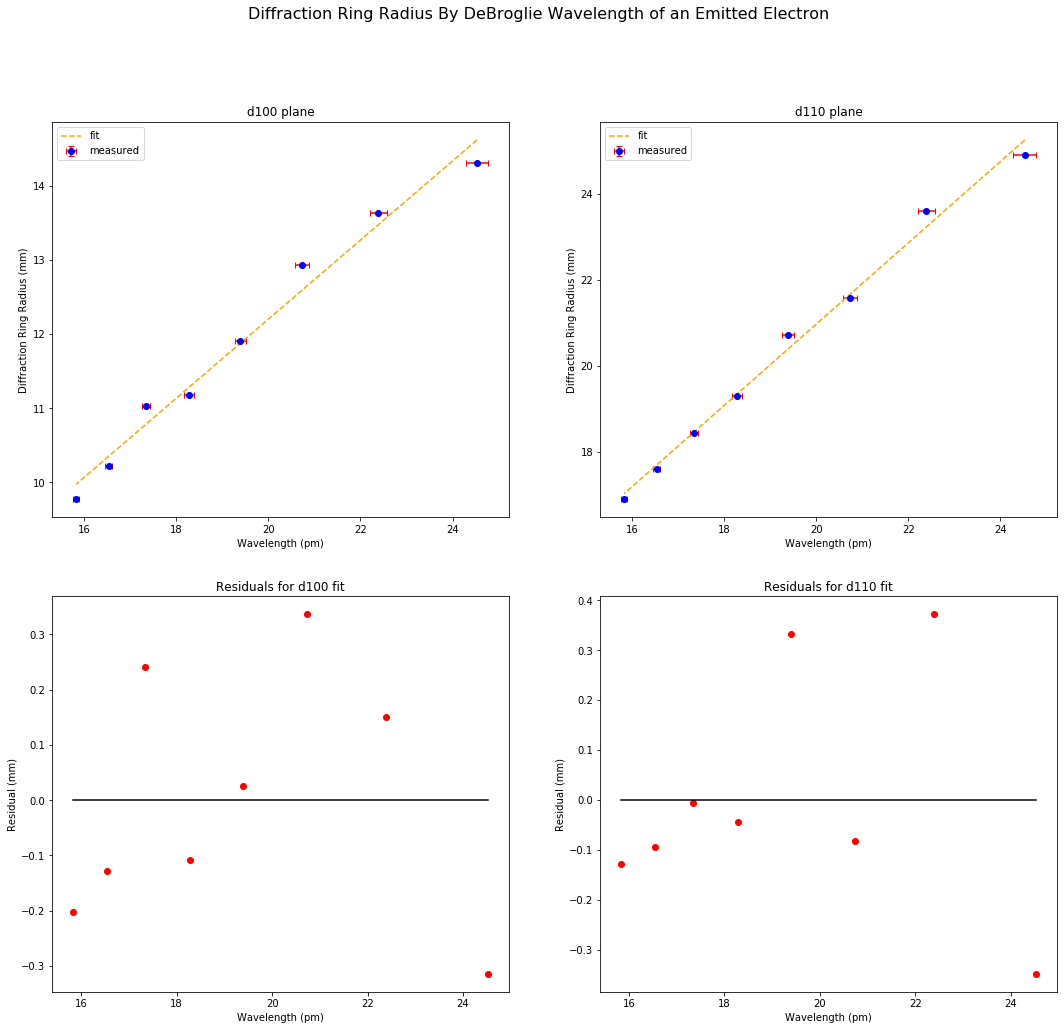

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(18, 16)
fig.suptitle('Diffraction Ring Radius By DeBroglie Wavelength of an Emitted Electron', fontsize=16)

ax1.errorbar(
    x=lambda_100_pm, 
    y=r_100_mm, 
    xerr=dlambda_100_pm, 
    yerr=dr_mm, 
    capsize=3, 
    color='blue',
    ecolor='r', 
    linestyle="None", 
    marker='o'
)
ax1.plot(lambda_100_pm, r_100_fit[0] * lambda_100_pm + r_100_fit[1], color='orange', linestyle='--')

ax1.legend(["fit", "measured"])
ax1.set_xlabel("Wavelength (pm)")
ax1.set_ylabel("Diffraction Ring Radius (mm)")
ax1.set_title("d100 plane")

ax2.errorbar(
    x=lambda_110_pm, 
    y=r_110_mm, 
    xerr=dlambda_110_pm, 
    yerr=dr_mm, 
    capsize=3, 
    color='blue',
    ecolor='r', 
    linestyle="None", 
    marker='o'
)
ax2.plot(lambda_110_pm, r_110_fit[0] * lambda_110_pm + r_110_fit[1], color='orange', linestyle='--')

ax2.legend(["fit", "measured"])
ax2.set_xlabel("Wavelength (pm)")
ax2.set_ylabel("Diffraction Ring Radius (mm)")
ax2.set_title("d110 plane")

ax3.plot(lambda_100_pm, r_100_mm - (r_100_fit[0] * lambda_100_pm + r_100_fit[1]), marker='o', linestyle='none', color='r')
ax3.plot(lambda_100_pm, lambda_100_pm * 0, linestyle='-', color='black')
ax3.set_title("Residuals for d100 fit")
ax3.set_xlabel("Wavelength (pm)")
ax3.set_ylabel("Residual (mm)")

ax4.plot(lambda_110_pm, r_110_mm - (r_110_fit[0] * lambda_110_pm + r_110_fit[1]), marker='o', linestyle='none', color='r')
ax4.plot(lambda_110_pm, lambda_110_pm * 0, linestyle='-', color='black')
ax4.set_title("Residuals for d110 fit")
ax4.set_xlabel("Wavelength (pm)")
ax4.set_ylabel("Residual (mm)")

pass

In [10]:
N = 8 # N is constant across all trials

_100_e = r_100_fit[0] * lambda_100_pm + r_100_fit[1]
_110_e = r_110_fit[0] * lambda_110_pm + r_110_fit[1]

# Calculate components of slope uncertainty
_100_sx = N * (lambda_100_pm ** 2).sum() - lambda_100_pm.sum() ** 2 
_110_sx = N * (lambda_110_pm ** 2).sum() - lambda_110_pm.sum() ** 2 

_100_syx = (N-2)**-1 * ((r_100_mm - _100_e) ** 2).sum()
_110_syx = (N-2)**-1 * ((r_110_mm - _110_e) ** 2).sum()

# Calculate final uncertainties
_100_sm = (N * _100_syx / _100_sx) ** 0.5
_110_sm = (N * _110_syx / _110_sx) ** 0.5

_100_sb = (_100_syx * (lambda_100_pm ** 2).sum() / _100_sx) ** 0.5
_110_sb = (_110_syx * (lambda_110_pm ** 2).sum() / _110_sx) ** 0.5

_100_chi = ((_100_e - r_100_mm) ** 2 / 0.005**2).sum() / N
_110_chi = ((_110_e - r_110_mm) ** 2 / 0.005**2).sum() / N

_100_p = chi2.sf(_100_chi, N-2)
_110_p = chi2.sf(_110_chi, N-2)

In [14]:
fits = pd.DataFrame(
    index =[100, 110],
    data ={
    "m"  : [r_100_fit[0], r_110_fit[0]],
    "sm" : [_100_sm, _110_sm],
    "b"  : [r_100_fit[1], r_110_fit[1]],
    "sb" : [_100_sb, _110_sb],
    "chi": [_100_chi, _110_chi],
    "p"  : [_100_p, _110_p]
})
fits

,m,sm,b,sb,chi,p
100,0.533210,0.030867,1.535218,0.604483,1812.505232,0.0
110,0.945369,0.032609,2.060149,0.638600,2022.875399,0.0


In [12]:
# r = 2 R / d lambda
# m = 2 R / d
# d = 2 R / m

R = 65 # mm
d_100 = 2 * R / fits["m"][100]
d_100_err = fits["sm"][100] / fits["m"][100] * d_100

d_110 = 2 * R / fits["m"][110]
d_110_err = fits["sm"][110] / fits["m"][110] * d_110

In [13]:
print("d_100 = {:.2f} +- {:.2f}".format(d_100, d_100_err))
print("d_110 = {:.2f} +- {:.2f}".format(d_110, d_110_err))

d_100 = 243.81 +- 14.11
d_110 = 137.51 +- 4.74
